# 4a. potoki transformujące zbiory danych

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ModuleNotFoundError: No module named 'sklearn'

In [93]:
# pipeline dla wartości numerycznych ze strategią mean i skalowaniem wartości w zakresie (-1, 1)
num_values_pipeline = Pipeline([
    ('impute_missing_values', SimpleImputer(strategy='mean')),
    ('scale_values', MinMaxScaler(feature_range=(-1,1))),
])

In [94]:
headers = 'symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price'          
data = pd.read_csv('automobile/imports-85.data', header=None, names=headers.split(','))
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [95]:
#zamienić ? na NaN
data = data.replace(to_replace='?', value= None).copy(deep=True)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,None,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [96]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [97]:
# wybrać tylko num attribute - spr. czy dane mają dobry data type
num_attributes = data.select_dtypes(include=['number'])
num_attributes

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


In [98]:
# sprawdzić data type dla kolumn, które nie znalazły się w powyższym df anle wg nas powinny być typu int/float
# normalized-losses, bore, stroke, horsepower, peak-rpm, price  
type(data['price'][1])

str

In [99]:
#zmiana data type na int/float
data[['normalized-losses']] = data[['normalized-losses']].dropna().astype(int)
data[['horsepower']] = data[['horsepower']].dropna().astype(int)
data[['peak-rpm']] = data[['peak-rpm']].dropna().astype(int)
data[['price']] = data[['price']].dropna().astype(int)
data[['bore']] = data[['bore']].dropna().astype(float)
data[['stroke']] = data[['stroke']].dropna().astype(float)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [100]:
#sprawdzenie
num_data = data.select_dtypes(include=['number'])
num_data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [104]:
# analiza czym wypełnić 2 brakujące pola dla 'num-of-doors'
data.columns
cat_data = data.select_dtypes(exclude=['number'])
filtered_df = cat_data[cat_data['num-of-doors'] == 'four']
filtered_df['body-style'].value_counts()

body-style
sedan        81
wagon        25
hatchback    10
Name: count, dtype: int64

In [103]:
# dwa brakujące pola dla 'num-of-doors' uzupełniamy wartością 'four' - po analizie
data.fillna({
    'num-of-doors': 'four',
}, inplace=True)
data


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [105]:
# pipeline dla wartości nienumerycznych / kategorialnych
cat_values_pipeline = Pipeline([
    ('encode_cat_values', OrdinalEncoder()),
])

In [106]:
# połączenie obu pipelins
preprocessing_pipeline = ColumnTransformer([
    ('num_attr', num_values_pipeline, data.select_dtypes('number').columns),
    ('cat_attr', cat_values_pipeline, ('make', 'fuel-type', 'aspiration', 'num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system')),
])

In [107]:
data_preprocessed = preprocessing_pipeline.fit_transform(data)
data_preprocessed

array([[ 1.        , -0.40314136, -0.88338192, ...,  0.        ,
         2.        ,  5.        ],
       [ 1.        , -0.40314136, -0.88338192, ...,  0.        ,
         2.        ,  5.        ],
       [ 0.2       , -0.40314136, -0.5393586 , ...,  5.        ,
         3.        ,  5.        ],
       ...,
       [-0.6       , -0.68586387,  0.31195335, ...,  5.        ,
         3.        ,  5.        ],
       [-0.6       , -0.68586387,  0.31195335, ...,  3.        ,
         3.        ,  3.        ],
       [-0.6       , -0.68586387,  0.31195335, ...,  3.        ,
         2.        ,  5.        ]])

In [108]:
data_preprocessed = pd.DataFrame(
    data_preprocessed,
    columns=preprocessing_pipeline.get_feature_names_out(),
    index=data.index,
)
data_preprocessed

,num_attr__symboling,num_attr__normalized-losses,num_attr__wheel-base,num_attr__length,num_attr__width,num_attr__height,num_attr__curb-weight,num_attr__engine-size,num_attr__bore,num_attr__stroke,...,cat_attr__make,cat_attr__fuel-type,cat_attr__aspiration,cat_attr__num-of-doors,cat_attr__body-style,cat_attr__drive-wheels,cat_attr__engine-location,cat_attr__engine-type,cat_attr__num-of-cylinders,cat_attr__fuel-system
0,1.0,-0.403141,-0.883382,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,...,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
1,1.0,-0.403141,-0.883382,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,...,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,5.0
2,0.2,-0.403141,-0.539359,-0.101493,-0.133333,-0.233333,0.035687,-0.313208,-0.800000,0.333333,...,0.0,1.0,0.0,1.0,2.0,2.0,0.0,5.0,3.0,5.0
3,0.6,0.036649,-0.230321,0.059701,-0.016667,0.083333,-0.341350,-0.637736,-0.071429,0.266667,...,1.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,2.0,5.0
4,0.6,0.036649,-0.253644,0.059701,0.016667,0.083333,0.036462,-0.433962,-0.071429,0.266667,...,1.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.6,-0.685864,0.311953,0.423881,0.433333,0.283333,0.135764,-0.396226,0.771429,0.028571,...,21.0,1.0,0.0,0.0,3.0,2.0,0.0,3.0,2.0,5.0
201,-0.6,-0.685864,0.311953,0.423881,0.416667,0.283333,0.211016,-0.396226,0.771429,0.028571,...,21.0,1.0,1.0,0.0,3.0,2.0,0.0,3.0,2.0,5.0
202,-0.6,-0.685864,0.311953,0.423881,0.433333,0.283333,0.182312,-0.154717,0.485714,-0.238095,...,21.0,1.0,0.0,0.0,3.0,2.0,0.0,5.0,3.0,5.0
203,-0.6,-0.685864,0.311953,0.423881,0.433333,0.283333,0.341350,-0.366038,-0.328571,0.266667,...,21.0,0.0,1.0,0.0,3.0,2.0,0.0,3.0,3.0,3.0


In [109]:
data_preprocessed.isna().sum()

num_attr__symboling            0
num_attr__normalized-losses    0
num_attr__wheel-base           0
num_attr__length               0
num_attr__width                0
num_attr__height               0
num_attr__curb-weight          0
num_attr__engine-size          0
num_attr__bore                 0
num_attr__stroke               0
num_attr__compression-ratio    0
num_attr__horsepower           0
num_attr__peak-rpm             0
num_attr__city-mpg             0
num_attr__highway-mpg          0
num_attr__price                0
cat_attr__make                 0
cat_attr__fuel-type            0
cat_attr__aspiration           0
cat_attr__num-of-doors         0
cat_attr__body-style           0
cat_attr__drive-wheels         0
cat_attr__engine-location      0
cat_attr__engine-type          0
cat_attr__num-of-cylinders     0
cat_attr__fuel-system          0
dtype: int64

## kodowanie gorącą jedynka dla wartości kategorialnych / nienumerycznych

In [115]:
from sklearn.preprocessing import OneHotEncoder

In [116]:
# pipeline dla wartości nienumerycznych / kategorialnych
cat_values_pipeline = Pipeline([
    ('encode_cat_values', OneHotEncoder()),
])

In [117]:
# połączenie obu pipelins
preprocessing_pipeline = ColumnTransformer([
    ('num', num_values_pipeline, data.select_dtypes('number').columns),
    ('cat', cat_values_pipeline, ('make', 'fuel-type', 'aspiration', 'num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system')),
])

In [118]:
data_preprocessed = preprocessing_pipeline.fit_transform(data)
data_preprocessed

array([[ 1.        , -0.40314136, -0.88338192, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.40314136, -0.88338192, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.2       , -0.40314136, -0.5393586 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.6       , -0.68586387,  0.31195335, ...,  1.        ,
         0.        ,  0.        ],
       [-0.6       , -0.68586387,  0.31195335, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       , -0.68586387,  0.31195335, ...,  1.        ,
         0.        ,  0.        ]])

In [119]:
data_preprocessed = pd.DataFrame(
    data_preprocessed,
    columns=preprocessing_pipeline.get_feature_names_out(),
    index=data.index,
)
data_preprocessed

,num__symboling,num__normalized-losses,num__wheel-base,num__length,num__width,num__height,num__curb-weight,num__engine-size,num__bore,num__stroke,...,cat__num-of-cylinders_twelve,cat__num-of-cylinders_two,cat__fuel-system_1bbl,cat__fuel-system_2bbl,cat__fuel-system_4bbl,cat__fuel-system_idi,cat__fuel-system_mfi,cat__fuel-system_mpfi,cat__fuel-system_spdi,cat__fuel-system_spfi
0,1.0,-0.403141,-0.883382,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,-0.403141,-0.883382,-0.173134,-0.366667,-0.833333,-0.177657,-0.479245,0.328571,-0.419048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.2,-0.403141,-0.539359,-0.101493,-0.133333,-0.233333,0.035687,-0.313208,-0.800000,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.6,0.036649,-0.230321,0.059701,-0.016667,0.083333,-0.341350,-0.637736,-0.071429,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.6,0.036649,-0.253644,0.059701,0.016667,0.083333,0.036462,-0.433962,-0.071429,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.6,-0.685864,0.311953,0.423881,0.433333,0.283333,0.135764,-0.396226,0.771429,0.028571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,-0.6,-0.685864,0.311953,0.423881,0.416667,0.283333,0.211016,-0.396226,0.771429,0.028571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,-0.6,-0.685864,0.311953,0.423881,0.433333,0.283333,0.182312,-0.154717,0.485714,-0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,-0.6,-0.685864,0.311953,0.423881,0.433333,0.283333,0.341350,-0.366038,-0.328571,0.266667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [140]:
xxx = data['price']
xxx

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

<Axes: >

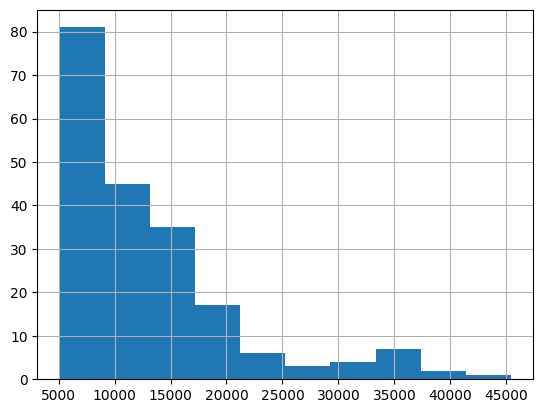

In [135]:
data['price'].hist(bins=10)

<Axes: >

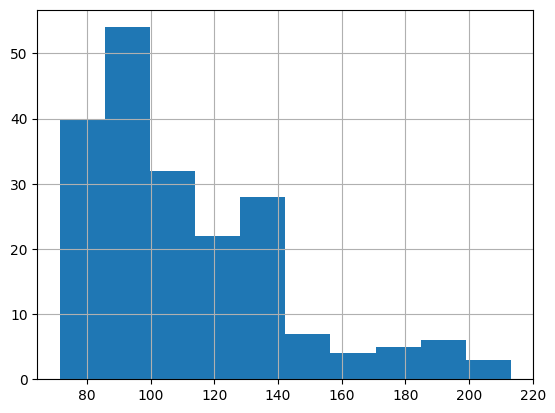

In [136]:
np.sqrt(data['price'].astype(float)).hist(bins=10)
#type(data['horsepower'][3])

<Axes: >

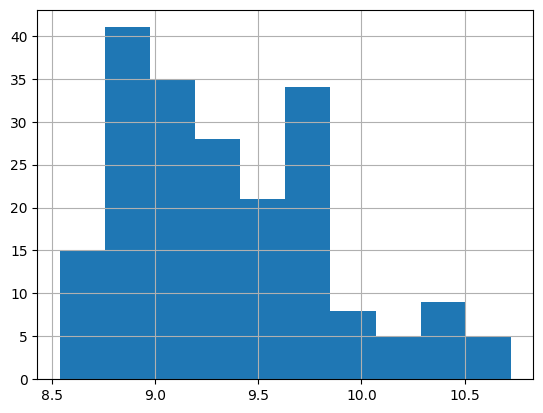

In [137]:
np.log(data['price'].astype(float)).hist(bins=10)